In [11]:
%pylab inline
# Neural Networks Demystified
# Part 1: Data + Architecture

from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs')

Populating the interactive namespace from numpy and matplotlib


In [12]:
#Import code from last time

#
from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs')
# Supporting code for short YouTube series on artificial neural networks.
#
# Stephen Welch
# @stephencwelch

import numpy as np

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize (by dividing by the maximum value in each array)
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [7]:
print X.shape, y.shape

(3, 2) (3, 1)


In [9]:
print X
print y

[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
    def forward(self, X):
        #Propagate inputs though network

In [22]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

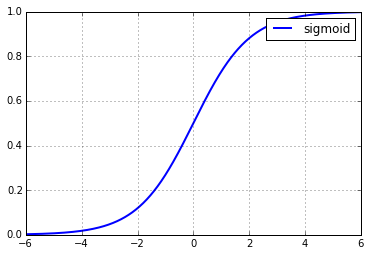

In [23]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)
legend(['sigmoid'])

In [17]:
sigmoid(1)

0.7310585786300049

In [18]:
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [19]:
sigmoid(np.random.randn(3,3))

array([[ 0.46600501,  0.37731874,  0.5415919 ],
       [ 0.23157348,  0.41235015,  0.55084673],
       [ 0.37693986,  0.10342644,  0.711002  ]])

In [30]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [25]:
NN= Neural_Network()
yHat=NN.forward(X)
print yHat

[[ 0.48736193]
 [ 0.54813314]
 [ 0.54630022]]


In [23]:
print y

[[ 0.75]
 [ 0.82]
 [ 0.93]]


In [ ]:
# Third part

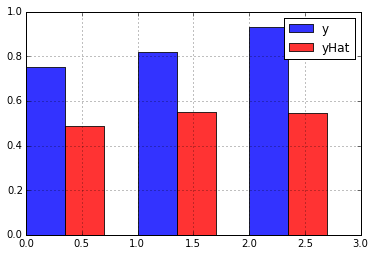

In [26]:
#Compare estimate, yHat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

In [ ]:
# Fourth part: https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%204%20Backpropagation.ipynb

In [28]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

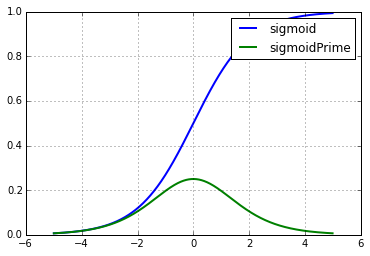

In [29]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])



In [31]:
NN = Neural_Network()
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
dJdW1

array([[-0.00916908, -0.00390022, -0.00285075],
       [-0.00483125, -0.00184321, -0.0016088 ]])

In [32]:
dJdW2

array([[-0.02903   ],
       [-0.02442499],
       [-0.04018761]])

In [33]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)
print cost1, cost2

0.0175075086056 0.0293176938671


In [34]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)
print cost2, cost3

0.0293176938671 0.0133981591651


#  Neural Networks Demystified
# Part 2: Forward Propagation 

In [6]:
# https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%202%20Forward%20Propagation.ipynb
from IPython.display import YouTubeVideo
YouTubeVideo('UJwK6jAStmg')

# Visualizations:

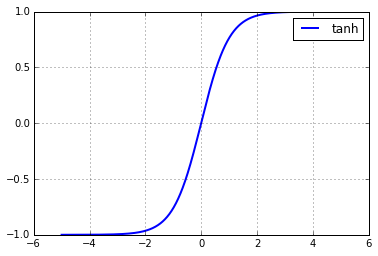

In [15]:
import numpy as np
testValues = np.arange(-5,5,0.01)

plot(testValues, np.tanh(testValues), linewidth=2)
grid(1)
legend(['tanh'])


In [17]:
def ReLU(x):
    return x * (x > 0)
# See here: http://stackoverflow.com/questions/32109319/how-to-implement-the-relu-function-in-numpy

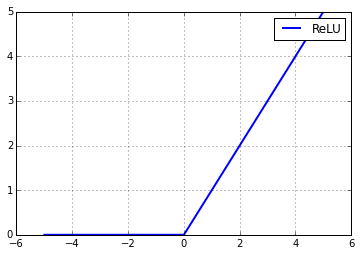

In [20]:
plot(testValues, ReLu(testValues), linewidth=2)
grid(1)
legend(['ReLU'])